# Dubai Real Estate Goldmine

### In this lesson, we will analyze the rental prices in Dubai and train a prediction model

<a href='https://www.kaggle.com/datasets/azharsaleem/real-estate-goldmine-dubai-uae-rental-market/data' target=_blank>You can find the data file here</a>

<img src=https://cdnp.flypgs.com/files/Sehirler-long-tail/Dubai/dubai-sehir.jpg width='600'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('dubai_properties.csv')

In [3]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [4]:
import seaborn as sns

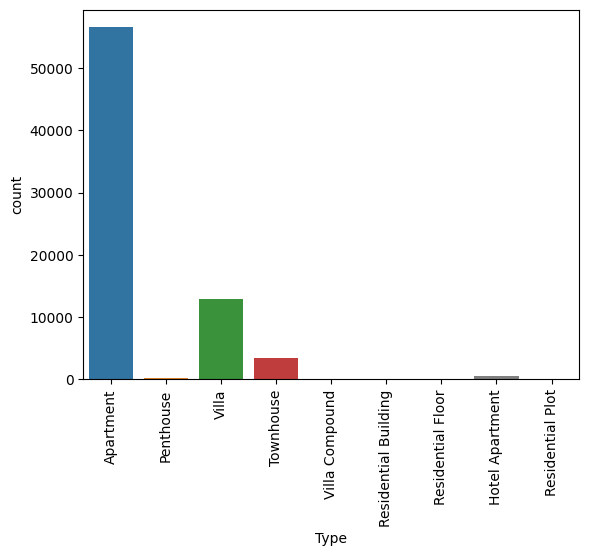

In [5]:

sns.countplot(x=df['Type']);
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

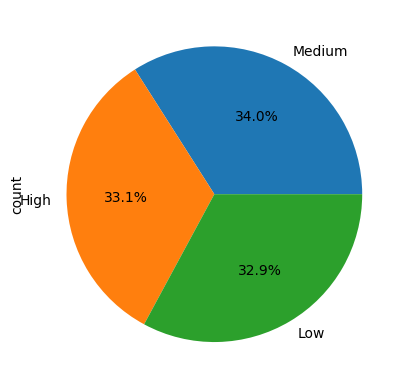

In [6]:
df['Rent_category'].value_counts().plot.pie(autopct='%1.1f%%')

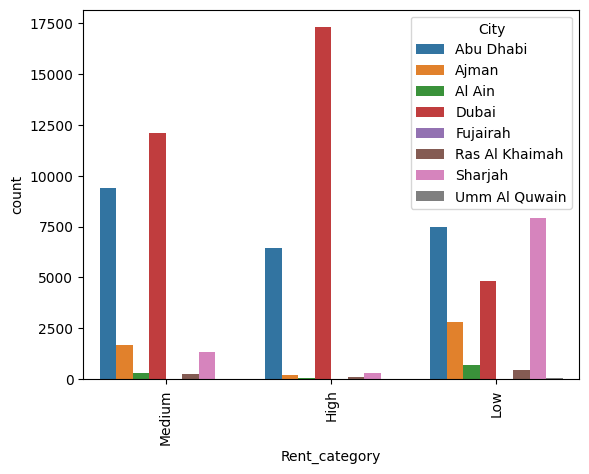

In [7]:
sns.countplot(x=df['Rent_category'],hue=df.City)
plt.xticks(rotation=90);

In [8]:
df.shape

(73742, 17)

In [9]:
df.isnull().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [10]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [12]:
df['Rent_category'].value_counts()

Rent_category
Medium    25088
High      24407
Low       24247
Name: count, dtype: int64

In [13]:
e={'Apartment': 0, 'Villa': 1,'Townhouse':2,'Hotel Apartment':3,'Penthouse':4,'Villa Compound':5,
  'Residential Building':6,'Residential Floor':7,'Residential Plot':8}

In [14]:
df['Type']=df['Type'].map(e)

In [15]:
f={'Medium':0,'High':1,'Low':2}

In [16]:
df['Rent_category']=df['Rent_category'].map(f)

In [17]:
g={'Unfurnished':0,'Furnished':1}

In [18]:
df['Furnishing']=df['Furnishing'].map(g)

In [19]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,0,1785,69.467787,0,Yearly,0,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,0,1422,98.452883,0,Yearly,0,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,0,1314,75.342466,0,Yearly,1,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,4,3843,57.246942,1,Yearly,0,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,1,6860,51.020408,1,Yearly,0,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [20]:
df.corr(numeric_only=True)

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Age_of_listing_in_days,Latitude,Longitude
Rent,1.000000,0.309589,0.080591,0.221997,0.405517,0.348656,-0.074506,0.097735,0.000885,0.027818,0.007516
Beds,0.309589,1.000000,0.752152,0.521396,0.603437,-0.175097,-0.269137,-0.191713,0.049681,-0.121073,-0.073702
Baths,0.080591,0.752152,1.000000,0.361923,0.473173,-0.246572,-0.292043,-0.174954,0.052536,-0.211196,-0.163747
Type,0.221997,0.521396,0.361923,1.000000,0.388575,-0.074388,-0.146039,-0.088738,-0.001778,-0.070050,-0.035788
Area_in_sqft,0.405517,0.603437,0.473173,0.388575,1.000000,-0.164866,-0.096769,-0.110691,0.016516,-0.066539,-0.041743
Rent_per_sqft,0.348656,-0.175097,-0.246572,-0.074388,-0.164866,1.000000,-0.200548,0.491208,-0.055062,0.159733,0.084221
Rent_category,-0.074506,-0.269137,-0.292043,-0.146039,-0.096769,-0.200548,1.000000,-0.135598,0.025069,0.095944,0.123887
Furnishing,0.097735,-0.191713,-0.174954,-0.088738,-0.110691,0.491208,-0.135598,1.000000,-0.047341,0.132304,0.083216
Age_of_listing_in_days,0.000885,0.049681,0.052536,-0.001778,0.016516,-0.055062,0.025069,-0.047341,1.000000,-0.073681,-0.054019
Latitude,0.027818,-0.121073,-0.211196,-0.070050,-0.066539,0.159733,0.095944,0.132304,-0.073681,1.000000,0.916877


In [21]:
df.describe()

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Age_of_listing_in_days,Latitude,Longitude
count,7.374200e+04,73742.000000,73742.000000,73742.000000,73742.000000,73742.000000,73742.000000,73742.000000,73742.000000,73742.000000,73742.000000
mean,1.479250e+05,2.162811,2.650213,0.313675,2054.053552,88.057754,0.988595,0.212633,74.261547,24.918929,55.053133
std,3.069658e+05,1.578155,1.632997,0.669444,3003.919252,66.534400,0.817864,0.409173,72.346767,0.566573,0.650527
min,0.000000e+00,0.000000,1.000000,0.000000,74.000000,0.000000,0.000000,0.000000,11.000000,15.175847,43.351928
25%,5.499900e+04,1.000000,2.000000,0.000000,850.000000,39.977778,0.000000,0.000000,30.000000,24.493598,54.607372
50%,9.800000e+04,2.000000,2.000000,0.000000,1334.000000,71.428571,1.000000,0.000000,52.000000,25.077802,55.219353
75%,1.700000e+05,3.000000,3.000000,0.000000,2130.000000,118.483412,2.000000,0.000000,95.000000,25.197978,55.361196
max,5.500000e+07,12.000000,11.000000,8.000000,210254.000000,2182.044888,2.000000,1.000000,2276.000000,25.920310,56.361294


In [22]:
x = df.drop(['Frequency', 'Address', 'Purpose', 'Posted_date', 'Rent'], axis=1)
y = df[['Rent']]

In [23]:
x=pd.get_dummies(df,drop_first=True)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [27]:
model=Sequential()
model.add(Dense(120,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mse', optimizer='adam')

In [28]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=128,epochs=10,verbose=1)

Epoch 1/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 12378398720.0000 - val_loss: 37958.0000
Epoch 2/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 93367.9922 - val_loss: 381053.3750
Epoch 3/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 53520.5039 - val_loss: 9457.6699
Epoch 4/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2054270.2500 - val_loss: 47532.9766
Epoch 5/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 14835.1377 - val_loss: 225169.8594
Epoch 6/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 494269.3750 - val_loss: 13610206.0000
Epoch 7/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 14698509.0000 - val_loss: 6381974.0000
Epoch 8/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 567528.0000 - val_loss: 152049.5469
Epoch 9/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 574938.3125 - val_loss: 17720.3340
Epoch 10/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 66554.0078 - val_loss: 140785008.0000


In [29]:
tahmin=model.predict(x_test)

461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step


In [30]:
from sklearn.metrics import r2_score, mean_squared_error

In [31]:
r2_score(y_test,tahmin)

0.9994942751508415

In [32]:
mean_squared_error(y_test,tahmin)**.5

11865.280995236879

In [33]:
model.save('Dubai.keras')

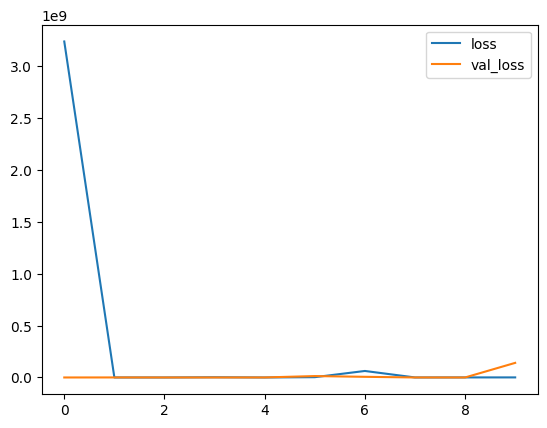

In [34]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

# r2_score 0.99
# We see that Dubai and Abu Dhabi are expensive